# Phase 4 Project

## Time Series Model

Let us start by loading the datasets and see what type of data we are dealing with

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Let's load US energy generation

In [17]:
df = pd.read_csv('organised_Gen.csv',
                 parse_dates={ 'date': ['YEAR', 'MONTH'] })
df

,date,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,0,AK,Total Electric Power Industry,Coal,46903.0
1,2001-01-01,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001-01-01,2,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001-01-01,3,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001-01-01,4,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
496769,2022-05-01,10581,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,2022-05-01,10582,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,2022-05-01,10583,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,2022-05-01,10584,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


In [24]:
df.set_index('date', inplace=True)
df

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-01-01,0,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,1,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,2,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,3,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,4,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...
2022-05-01,10581,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
2022-05-01,10582,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
2022-05-01,10583,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0


Very interesting! Could pick a couple of energy sources and analyze them in parallel

ok sure

In [26]:
df['ENERGY SOURCE'].value_counts()

Total                             73356
Natural Gas                       66684
Petroleum                         63176
Coal                              47642
Other Biomass                     46148
Hydroelectric Conventional        38842
Other                             36241
Wood and Wood Derived Fuels       30524
Wind                              25421
Solar Thermal and Photovoltaic    19393
Other Gases                       18212
Nuclear                           16754
Pumped Storage                    10139
Geothermal                         4242
Name: ENERGY SOURCE, dtype: int64

In [27]:
TX=df.loc[df['STATE']=='TX']
TX

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-01-01,1329,TX,Total Electric Power Industry,Coal,11683911.0
2001-01-01,1330,TX,Total Electric Power Industry,Petroleum,1428770.0
2001-01-01,1331,TX,Total Electric Power Industry,Natural Gas,13750546.0
2001-01-01,1332,TX,Total Electric Power Industry,Other Gases,146044.0
2001-01-01,1333,TX,Total Electric Power Industry,Nuclear,3545310.0
...,...,...,...,...,...
2022-05-01,10243,TX,"Electric Generators, Electric Utilities",Petroleum,2177.0
2022-05-01,10244,TX,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,2177.0
2022-05-01,10245,TX,"Electric Generators, Electric Utilities",Other Biomass,0.0


In [28]:
NY=df.loc[df['STATE']=='NY']
NY

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-01-01,1029,NY,Total Electric Power Industry,Coal,2453303.0
2001-01-01,1030,NY,Total Electric Power Industry,Petroleum,2756448.0
2001-01-01,1031,NY,Total Electric Power Industry,Natural Gas,1899517.0
2001-01-01,1032,NY,Total Electric Power Industry,Other Gases,6580.0
2001-01-01,1033,NY,Total Electric Power Industry,Nuclear,3333411.0
...,...,...,...,...,...
2022-05-01,9863,NY,"Electric Generators, Electric Utilities",Pumped Storage,-31572.0
2022-05-01,9864,NY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,1957721.0
2022-05-01,9865,NY,"Electric Generators, Electric Utilities",Natural Gas,987597.0


In [29]:
TX['ENERGY SOURCE']

date
2001-01-01                              Coal
2001-01-01                         Petroleum
2001-01-01                       Natural Gas
2001-01-01                       Other Gases
2001-01-01                           Nuclear
                           ...              
2022-05-01                         Petroleum
2022-05-01    Solar Thermal and Photovoltaic
2022-05-01                     Other Biomass
2022-05-01                              Wind
2022-05-01       Wood and Wood Derived Fuels
Name: ENERGY SOURCE, Length: 11957, dtype: object

In [30]:
TX_oil=TX.loc[TX['ENERGY SOURCE']=='Petroleum']

In [32]:
TX_oil

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-01-01,1330,TX,Total Electric Power Industry,Petroleum,1428770.0
2001-01-01,1342,TX,"Electric Generators, Electric Utilities",Petroleum,1317036.0
2001-01-01,1349,TX,"Electric Generators, Independent Power Producers",Petroleum,261.0
2001-01-01,1356,TX,"Combined Heat and Power, Electric Power",Petroleum,101277.0
2001-01-01,1360,TX,"Combined Heat and Power, Commercial Power",Petroleum,337.0
...,...,...,...,...,...
2022-05-01,10203,TX,Total Electric Power Industry,Petroleum,12907.0
2022-05-01,10212,TX,"Combined Heat and Power, Industrial Power",Petroleum,9348.0
2022-05-01,10220,TX,"Combined Heat and Power, Commercial Power",Petroleum,0.0


In [33]:
TX_oilf=TX_oil.loc[TX_oil['TYPE OF PRODUCER']=='Total Electric Power Industry']

In [34]:
TX_oilf

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-01-01,1330,TX,Total Electric Power Industry,Petroleum,1428770.0
2001-02-01,3001,TX,Total Electric Power Industry,Petroleum,303792.0
2001-03-01,4675,TX,Total Electric Power Industry,Petroleum,213414.0
2001-04-01,6352,TX,Total Electric Power Industry,Petroleum,133996.0
2001-05-01,8031,TX,Total Electric Power Industry,Petroleum,117381.0
...,...,...,...,...,...
2022-01-01,1734,TX,Total Electric Power Industry,Petroleum,12474.0
2022-02-01,3853,TX,Total Electric Power Industry,Petroleum,26279.0
2022-03-01,5970,TX,Total Electric Power Industry,Petroleum,13208.0


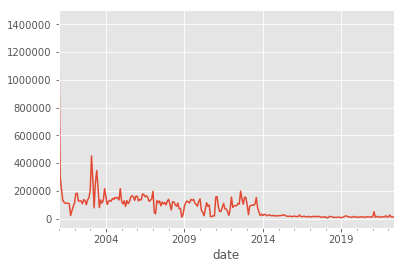

In [35]:
TX_oilf['GENERATION (Megawatthours)'].plot();

In [36]:
TX_oilg=TX_oilf.iloc[1: , :]

In [37]:
TX_oilg

,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,,
2001-02-01,3001,TX,Total Electric Power Industry,Petroleum,303792.0
2001-03-01,4675,TX,Total Electric Power Industry,Petroleum,213414.0
2001-04-01,6352,TX,Total Electric Power Industry,Petroleum,133996.0
2001-05-01,8031,TX,Total Electric Power Industry,Petroleum,117381.0
2001-06-01,9715,TX,Total Electric Power Industry,Petroleum,110543.0
...,...,...,...,...,...
2022-01-01,1734,TX,Total Electric Power Industry,Petroleum,12474.0
2022-02-01,3853,TX,Total Electric Power Industry,Petroleum,26279.0
2022-03-01,5970,TX,Total Electric Power Industry,Petroleum,13208.0


In [42]:
TX_oilg.index

DatetimeIndex(['2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01',
               '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
               '2001-10-01', '2001-11-01',
               ...
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', name='date', length=256, freq=None)

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


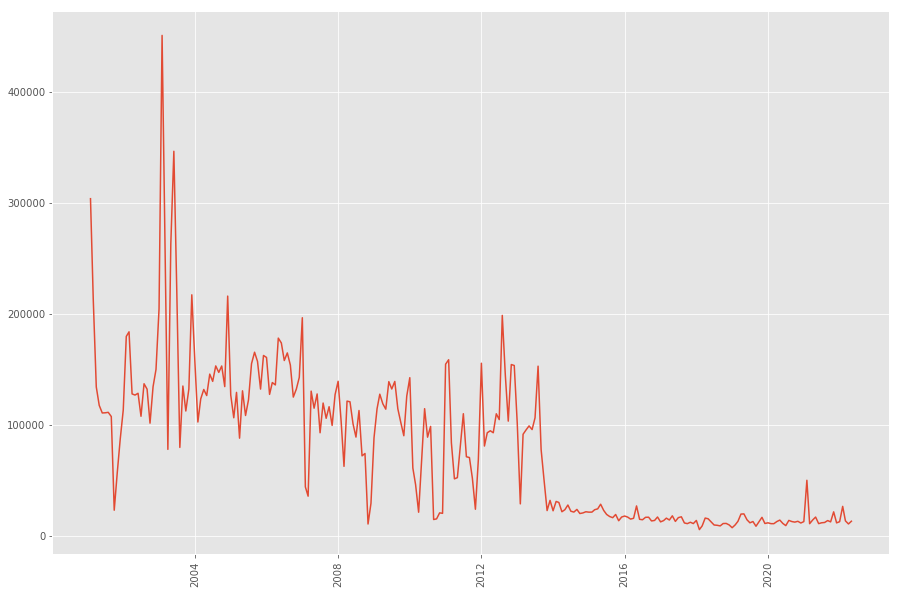

In [43]:
fig = plt.figure(figsize=(15,10))
#plt.plot(solar)
plt.plot(TX_oilg.index,TX_oilg['GENERATION (Megawatthours)'])
plt.xticks(rotation=90)
plt.show()